In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"amitabhshukla","key":"8372bb35c9d4d2353d65c8c4b37a9b32"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install torch torchvision --upgrade


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━

In [ ]:
! kaggle datasets download -d trolukovich/food11-image-dataset

100% 1.08G/1.08G [00:12<00:00, 107MB/s] 
100% 1.08G/1.08G [00:12<00:00, 93.6MB/s]


In [ ]:
import pathlib
from pathlib import Path

data = Path("Data")
if data.is_dir():
  print("Directory alredy exists....")
else:
  print("Creating directory....")
  data.mkdir(parents = True,exist_ok = True)
  print("Directory Created")

Creating directory....
Directory Created


In [ ]:
import zipfile

with zipfile.ZipFile("food11-image-dataset.zip","r") as f:
  f.extractall(path = data)

In [ ]:
import torch
from torch import nn
import torchvision
import matplotlib.pyplot as plt


/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


(-0.5, 511.5, 511.5, -0.5)

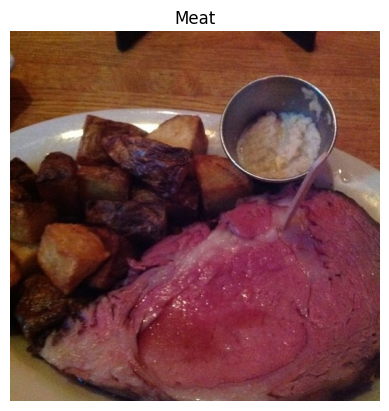

In [ ]:
import os
import random
import PIL
from PIL import Image


def get_image_paths(root_directory):
    image_paths = []

    for root, dirs, files in os.walk(root_directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                image_paths.append(os.path.join(root, file))

    return image_paths

data_directory = data

image_paths = get_image_paths(data_directory)

i = random.randint(0,len(image_paths))
rand_path = str(image_paths[i])
img = Image.open(rand_path)
plt.title(rand_path.split("/")[2])
img
plt.imshow(img)
plt.axis(False)


## Create Efficientnet_B2 Model

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
from torchvision.models import efficientnet_b2

**Create model --> Create weights --> Make Transforms --> Add Data augmentation to the Transforms**

In [ ]:
from torchvision import transforms
weights = torchvision.models.EfficientNet_B2_Weights.DEFAULT
transforms_1 = weights.transforms()

In [ ]:
effnetb2_model = efficientnet_b2(weights = weights)

Downloading: "https://download.pytorch.org/models/efficientnet_b2_rwightman-c35c1473.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b2_rwightman-c35c1473.pth
100%|██████████| 35.2M/35.2M [00:00<00:00, 132MB/s]


In [ ]:
auto_transform = transforms.Compose([transforms.TrivialAugmentWide(),
                                     transforms_1])

**Summary --> freeze base layer --> update classifier head**

In [ ]:
try:
  import torchinfo
  from torchinfo import summary
except:
  print("torchinfo is not present instaling.....")
  !pip install torchinfo
  import torchinfo
  from torchinfo import summary

torchinfo is not present instaling.....


In [ ]:
summary(effnetb2_model, input_size=(1, 3, 288, 288), col_names=["input_size", "output_size", "num_params", "trainable"], row_settings = ["var_names"] )

Layer (type (var_name))                                      Input Shape               Output Shape              Param #                   Trainable
EfficientNet (EfficientNet)                                  [1, 3, 288, 288]          [1, 1000]                 --                        True
├─Sequential (features)                                      [1, 3, 288, 288]          [1, 1408, 9, 9]           --                        True
│    └─Conv2dNormActivation (0)                              [1, 3, 288, 288]          [1, 32, 144, 144]         --                        True
│    │    └─Conv2d (0)                                       [1, 3, 288, 288]          [1, 32, 144, 144]         864                       True
│    │    └─BatchNorm2d (1)                                  [1, 32, 144, 144]         [1, 32, 144, 144]         64                        True
│    │    └─SiLU (2)                                         [1, 32, 144, 144]         [1, 32, 144, 144]         --                

In [ ]:
for params in effnetb2_model.parameters():
  params.requires_grad = False

effnetb2_model.classifier = nn.Sequential(
    nn.Dropout(p=0.3,inplace = True),
    nn.Linear(in_features = 1408,
              out_features = 11)
)

In [ ]:
summary(effnetb2_model, input_size=(1, 3, 288, 288), col_names=["input_size", "output_size", "num_params", "trainable"], row_settings = ["var_names"] )

Layer (type (var_name))                                      Input Shape               Output Shape              Param #                   Trainable
EfficientNet (EfficientNet)                                  [1, 3, 288, 288]          [1, 11]                   --                        Partial
├─Sequential (features)                                      [1, 3, 288, 288]          [1, 1408, 9, 9]           --                        False
│    └─Conv2dNormActivation (0)                              [1, 3, 288, 288]          [1, 32, 144, 144]         --                        False
│    │    └─Conv2d (0)                                       [1, 3, 288, 288]          [1, 32, 144, 144]         (864)                     False
│    │    └─BatchNorm2d (1)                                  [1, 32, 144, 144]         [1, 32, 144, 144]         (64)                      False
│    │    └─SiLU (2)                                         [1, 32, 144, 144]         [1, 32, 144, 144]         --         

### Load data --> Create dataLoader.

In [ ]:
from torchvision.datasets import ImageFolder
train_data = ImageFolder(root = "Data/training",transform = auto_transform)
test_data = ImageFolder(root = "Data/validation",transform = auto_transform)

In [ ]:
import os
NUM_WORKERS = os.cpu_count()
NUM_WORKERS

2

In [ ]:
train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True, num_workers=NUM_WORKERS)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=True, num_workers=NUM_WORKERS)

In [ ]:
len(train_dataloader),len(test_dataloader)

(155, 54)

# **Train Model**

**Loss function and Optimizer**

In [ ]:
optimizer = torch.optim.Adam(effnetb2_model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss(label_smoothing=0.1)

## Create Training loop

In [ ]:
from tqdm.auto import tqdm
Epochs = 10

for epoch in tqdm(range(Epochs)):
  effnetb2_model.train()
  train_acc = 0
  train_loss = 0
  for x,y in train_dataloader:
    x,y = x.to(device), y.to(device)
    y_pred = effnetb2_model(x)
    pred_probs = torch.softmax(y_pred, dim= 1)
    pred_labels = torch.argmax(pred_probs, dim = 1)
    loss = loss_fn(y_pred,y)
    train_loss = train_loss + loss.item()
    train_acc += torch.sum(pred_labels == y).item()/len(y_pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss = train_loss/len(train_dataloader)
  train_acc = train_acc/len(train_dataloader)
  print('.........................................................................................................')
  test_loss,test_acc = 0,0
  for w,z in test_dataloader:
    w,z = w.to(device),z.to(device)
    effnetb2_model.eval()
    with torch.inference_mode():
      test_pred =effnetb2_model(w)
      test_pred_probs = torch.softmax(test_pred, dim = 1)
      test_label = torch.argmax(test_pred_probs , dim =1 )
      test_loss += loss_fn(test_pred,z)
      test_acc += torch.sum(test_label == z).item()/len(test_pred)
  test_acc = test_acc/len(test_dataloader)
  test_loss = test_loss/len(test_dataloader)
  print(f" Tain accuracy : {train_acc : 0.4f} | train loss : {train_loss : 0.2f} | test accuracy : {test_acc : 0.4f} | test loss: {test_loss : 0.2f}")

  0%|          | 0/10 [00:00<?, ?it/s]

.........................................................................................................
 Tain accuracy :  0.7292 | train loss :  1.21 | test accuracy :  0.7668 | test loss:  1.13
.........................................................................................................
 Tain accuracy :  0.7531 | train loss :  1.14 | test accuracy :  0.7834 | test loss:  1.10
.........................................................................................................
 Tain accuracy :  0.7658 | train loss :  1.12 | test accuracy :  0.7894 | test loss:  1.08
.........................................................................................................
 Tain accuracy :  0.7769 | train loss :  1.10 | test accuracy :  0.8088 | test loss:  1.05
.........................................................................................................
 Tain accuracy :  0.7791 | train loss :  1.09 | test accuracy :  0.7985 | test loss:  1.06
...............

In [ ]:
classes = train_data.classes
print(classes)

['Bread', 'Dairy product', 'Dessert', 'Egg', 'Fried food', 'Meat', 'Noodles-Pasta', 'Rice', 'Seafood', 'Soup', 'Vegetable-Fruit']


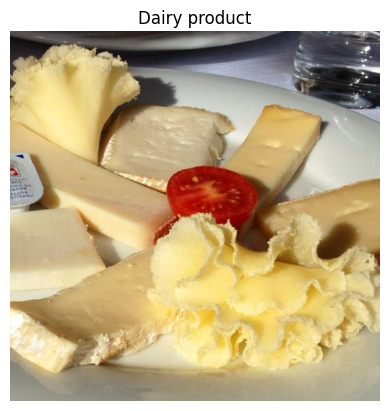

In [ ]:
img_path = "Data/evaluation/Dairy product/11.jpg"
classes = train_data.classes
img = Image.open(img_path)
transformed_image = auto_transform(img).to(device)
#transformed_image.shape ,transformed_image.type()
effnetb2_model.eval()
with torch.inference_mode() :
  input_img = torch.unsqueeze(transformed_image,dim = 1)
  input_image = input_img.permute(1,0,2,3)
  #print(input_image.shape)
  img_pred = effnetb2_model(input_image)
  raw_logits = torch.softmax(img_pred,dim=1)
  pred_img_label = torch.argmax(raw_logits,dim = 1)
  #print(raw_logits)
  plt.title(classes[pred_img_label])
  plt.imshow(img)
  plt.axis(False)



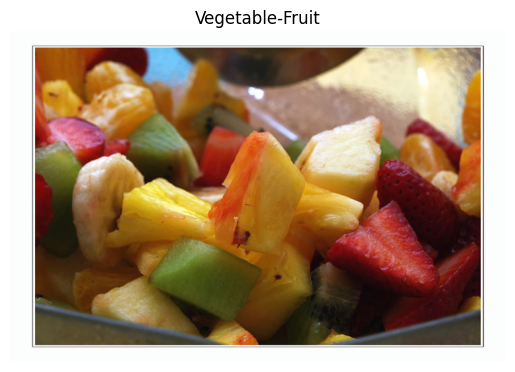

In [ ]:
img_path = "Data/evaluation/Vegetable-Fruit/102.jpg"
classes = train_data.classes
img = Image.open(img_path)
transformed_image = auto_transform(img).to(device)
#transformed_image.shape ,transformed_image.type()
effnetb2_model.eval()
with torch.inference_mode() :
  input_img = torch.unsqueeze(transformed_image,dim = 1)
  input_image = input_img.permute(1,0,2,3)
  #print(input_image.shape)
  img_pred = effnetb2_model(input_image)
  raw_logits = torch.softmax(img_pred,dim=1)
  pred_img_label = torch.argmax(raw_logits,dim = 1)
  #print(raw_logits)
  plt.title(classes[pred_img_label])
  plt.imshow(img)
  plt.axis(False)



## Saving the model state_dict()

In [ ]:
model_path = Path("models")
if model_path.is_dir():
  print("path exists")
else:
  model_path.mkdir(parents = True, exist_ok = True)

In [ ]:
torch.save(obj = effnetb2_model.state_dict(),f = model_path/"effnetb2_model_1.pth" )

**______________________**

In [ ]:
import IPython

In [ ]:
# Enable cell magic
IPython.get_ipython().run_cell_magic("javascript", "", "IPython.notebook.kernel.execute = function(cell) {\n  if (cell.cell_type === 'code' && cell.source.startsWith('%%')) {\n    var output = IPython.notebook.execute_cell(cell);\n    return output;\n  } else {\n    return IPython.notebook.kernel.execute(cell);\n  }\n};")

<IPython.core.display.Javascript object>

In [ ]:
from IPython.display import Javascript

Javascript("""
IPython.notebook.kernel.execute = function(cell) {
  if (cell.cell_type === 'code' && cell.source.startsWith('%%')) {
    var output = IPython.notebook.execute_cell(cell);
    return output;
  } else {
    return IPython.notebook.kernel.execute(cell);
  }
};
""")

<IPython.core.display.Javascript object>

In [ ]:
%% writefile FoodVision11/model.py
print("Amitabh")

UsageError: Cell magic `%%` not found.
